In [1]:
# Data source: https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
%matplotlib inline


## Load in data

In [3]:
# Competitions Data
df_compet = pd.read_json("data/competitions.json")

# Team Data
df_team = pd.read_json("data/teams.json")
# Create league and format variable
league_col =[]
format_col=[]
for idx,row in df_team.iterrows():
    league_col += [row['area']['name']]
    if row['name'] == row['area']['name']:
        format_col += ['International cup']
    else:
        format_col += ['Domestic league']
df_team['League'] = league_col
df_team['Format'] = format_col


# Match data
match_files = glob.glob( "data/matches/*.json")
df_match = pd.read_json("data/matches/matches_England.json")

df_match['eventId'] = df_match.apply(lambda row: row.wyId, axis = 1)


# Player data
df_player = pd.read_json("data/players.json")

# Event data
event_files = glob.glob( "data/events/*.json")
df_events = pd.read_json('data/events/events_England.json')
# for x in range(1,len(all_files)):
#     events = events.append(pd.read_json(all_files[x]))

## Data Overview

### Comptitions (df_compet)
1. name -- League name
2. wyID -- Common dataset identifier. Will probably be used to join with another table.

In [4]:
# Examine Competition Table
df_compet

,name,wyId,format,area,type
0,Italian first division,524,Domestic league,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
1,English first division,364,Domestic league,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Spanish first division,795,Domestic league,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,French first division,412,Domestic league,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,German first division,426,Domestic league,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
5,European Championship,102,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XEU', 'al...",international
6,World Cup,28,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XWO', 'al...",international


### Teams (df_teams)
1. Nothing really, mainly just team name and country
2. wyId (join column)

[Text(0, 0, 'England'),
 Text(1, 0, 'Spain'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'Italy'),
 Text(5, 0, 'Wales'),
 Text(6, 0, 'Ireland Republic')]

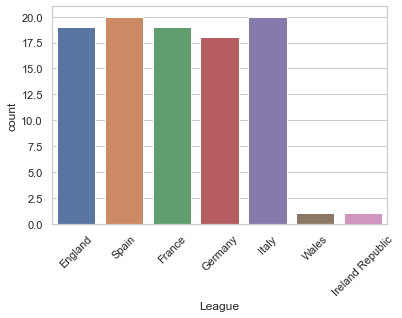

In [5]:
# Examine Team Table
sns.set_theme(style="whitegrid")
# ax = sns.barplot(x = 'League', y = df_team['League'].value_counts(), data = df_team)

team_counts = sns.countplot(x='League', data=df_team[df_team['Format']=='Domestic league'])
team_counts.set_xticklabels(team_counts.get_xticklabels(), rotation=45)

### Matches (df_match)
1. gameweek
2. seasonId
3. dateutc
4. wyId
5. Season
6. some other stuff

In [6]:
# Examine match table(s) -- honestly not much to see until we join this to another table.

# # Code below indicates all the match data is from 2017/2018 season
# df_match['Season'] = df_match.apply(lambda row: row.dateutc.split('-')[0], axis = 1)
# df_match['Season'].value_counts()

df_match.shape # -- output: 380 = full season of games
df_match.head(2)


,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,eventId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,2500089
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,2500090


### Players (df_player)
1. personal details mostly.
2. currentTeamId
3. wyId -- table joining attribute
4. id 

In [7]:
# player data
df_players = pd.read_json("data/players.json")
player_cols = ['passportArea','currentTeamId']
print(df_players.shape)
print(df_players.columns)
df_players.head(2)

(3603, 14)
Index(['passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId',
       'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423


### Events (df_events):
###### Doesn't have any match/league name so need to join with matches to figure out which league the event files correspond to
1. eventName 
2. subEventName
3. playerId
4. tags (indicates successful pass or on target shot, ect)
5. positions (x,y)
6. matchId
7. teamId
8. eventSec

#### Notes
Link here:https://www.nature.com/articles/s41597-019-0247-7/tables/3 shows the tag values... except doesn't give us the proper key. 

FUCK YEAH FOUND THE KEY BITCHES https://dataglossary.wyscout.com/

Pass: accurate = 1801, not accurate = 1802, key pass = 302, opportunity = 201, assist, goal
1401 = ?, 1901 = ?, 402 = ?, 801 = ?

Shot: accurate, not accurate, block, opportunity, assist, goal = 101
401 = ?, 

Duel: Successful = 703, Unsuccessful = 701 (Arial Duel), Clearly won=703, Clearly lost=701, Neutral=702 (Defensive Duel / Offensive Duel)
- Note that offensive duel is when someone is trying to dribble a defender (601=beaten to ball by defender).

tagId's: 201 = Opportunity, 

In [131]:
crit = ['eventName', 'subEventName','tags']
ev = df_events[crit]
count = 0
for idx,row in ev.iterrows():
    if row['eventName']=='Shot': # and len(row['tags']) >= 2:
        for tag in row['tags']:
            if tag['id'] == 101:
                prev_ev = ev.loc[idx-1]
                print(prev_ev['eventName'],prev_ev['subEventName'])
                print(prev_ev['tags'])
                print(row['eventName'],row['subEventName'])
                print(row['tags'])
                print('\n')
        
#         print(ev.loc[idx+1])
#         print('\n')
                count+=1
        
    if count >= 10:
        break

Pass Cross
[{'id': 301}, {'id': 402}, {'id': 801}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1205}, {'id': 1801}]


Duel Air duel
[{'id': 703}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 403}, {'id': 201}, {'id': 1207}, {'id': 1801}]


Pass Cross
[{'id': 301}, {'id': 401}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1203}, {'id': 1801}]


Pass Simple pass
[{'id': 301}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1203}, {'id': 1801}]


Duel Air duel
[{'id': 701}, {'id': 1802}]
Shot Shot
[{'id': 101}, {'id': 403}, {'id': 201}, {'id': 1205}, {'id': 1801}]


Pass Simple pass
[{'id': 301}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 402}, {'id': 201}, {'id': 1204}, {'id': 1801}]


Duel Air duel
[{'id': 703}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 403}, {'id': 201}, {'id': 1208}, {'id': 1801}]


Pass Smart pass
[{'id': 301}, {'id': 1901}, {'id': 901}, {'id': 1801}]
Shot Shot
[{'id': 101}, {'id': 1901}

## Combine Tables

Going to try two formats for combining the data due to postgres database limitations (only 10,000 rows).

1. Each row is a game (so 380 rows) and each row has the match overall stats. Stats would be computed from events and then output would be a json file of all the games
2. Each row is a game but we have a column called events and the event value is just a dictionary of every event for that game... Dict key would probably be the eventSec (when it happened or I just assign a idx value starting at 0)

#### Notes
When I join match and event tables they both have event_id columns that correspond to different things. eventId (events) refers to the number value that corresponds to the event type (8=Pass) while the eventId (match) refers to something totally different. We don't need the match eventId which ends up getting labeled as event_id_y

###  Join Match and Event tables -- matchId (events) and wyId (match)

In [136]:
import warnings
warnings.filterwarnings("ignore")
# Join Event dataset and Matches dataset
match_events_df = df_events.merge(df_match, left_on='matchId', right_on='wyId')
df_players.rename(columns={"wyId":"playerId"},inplace=True) # rename column to match same one in match_events_df
match_events_df = match_events_df.merge(df_players, on='playerId', how='left').fillna('NA')

# filter out cols we don't need
event_col = ['eventId_x', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec',
       'gameweek', 'dateutc',
        'wyId', 'label','firstName',
       'middleName', 'lastName']
match_events_df = match_events_df[event_col]

# Pick just one game
sub_matches = match_events_df[match_events_df['label'].isin(['Tottenham Hotspur - Arsenal, 1 - 0',
                                                         'Arsenal - Tottenham Hotspur, 2 - 0','Tottenham Hotspur - Leicester City, 5 - 4',
                                                           'Tottenham Hotspur - Liverpool, 4 - 1'])]

sub_matches.shape

(6725, 17)

In [137]:
sub_matches.head()

,eventId_x,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,gameweek,dateutc,wyId,label,firstName,middleName,lastName
145332,8,Simple pass,[{'id': 1801}],8319,"[{'y': 50, 'x': 51}, {'y': 69, 'x': 31}]",2499807,Pass,1612,1H,2.803540,9,2017-10-22 15:00:00,2499807,"Tottenham Hotspur - Liverpool, 4 - 1",James,,Milner
145333,8,High pass,[{'id': 1801}],14870,"[{'y': 69, 'x': 31}, {'y': 25, 'x': 63}]",2499807,Pass,1612,1H,5.204899,9,2017-10-22 15:00:00,2499807,"Tottenham Hotspur - Liverpool, 4 - 1",Jo\u00ebl Andre,,Job Matip
145334,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",18550,"[{'y': 25, 'x': 63}, {'y': 20, 'x': 62}]",2499807,Duel,1612,1H,7.451330,9,2017-10-22 15:00:00,2499807,"Tottenham Hotspur - Liverpool, 4 - 1",Emre,,Can
145335,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",54,"[{'y': 75, 'x': 37}, {'y': 80, 'x': 38}]",2499807,Duel,1624,1H,7.771387,9,2017-10-22 15:00:00,2499807,"Tottenham Hotspur - Liverpool, 4 - 1",Christian,,Dannemann Eriksen
145336,8,Simple pass,[{'id': 1801}],18550,"[{'y': 20, 'x': 62}, {'y': 7, 'x': 47}]",2499807,Pass,1612,1H,9.624698,9,2017-10-22 15:00:00,2499807,"Tottenham Hotspur - Liverpool, 4 - 1",Emre,,Can


In [138]:
# Create additional columns (x,y, tag1, tag2, tag3)
x_start = []
y_start = []
x_end = []
y_end = []
tags_1 = []
tags_2 = []
tags_3 = []
tags_4 = []
for idx,row in sub_matches.iterrows():
    pos = row['positions']
    x_start += [pos[0]['x']]
    y_start += [pos[0]['y']]
    
    if len(pos) == 2:
        x_end += [pos[1]['x']]
        y_end += [pos[1]['y']]
    else: 
        x_end += [-1]
        y_end += [-1]
    
    tags = row['tags']
    
    if len(tags) == 4:
        tags_1 += [tags[3]['id']]
        tags_2 += [tags[2]['id']]
        tags_3 += [tags[1]['id']]
        tags_4 += [tags[0]['id']]
    elif len(tags) == 3:
        tags_1 += [tags[2]['id']]
        tags_2 += [tags[1]['id']]
        tags_3 += [tags[0]['id']]
        tags_4 += ['NaN']
    elif len(tags) == 2:
        tags_1 += [tags[1]['id']]
        tags_2 += [tags[0]['id']]
        tags_3 += ['NaN']
        tags_4 += ['NaN']
    elif len(tags) == 1:
        tags_1 += [tags[0]['id']]
        tags_2 += ['NaN']
        tags_3 += ['NaN']
        tags_4 += ['NaN']
    else: 
        tags_1 += ['NaN']
        tags_2 += ['NaN']
        tags_3 += ['NaN']
        tags_4 += ['NaN']
        
sub_matches['x_start'] = x_start
sub_matches['y_start'] = y_start
sub_matches['x_end'] = x_end
sub_matches['y_end'] = y_end
sub_matches['tag_1'] = tags_1
sub_matches['tag_2'] = tags_2
sub_matches['tag_3'] = tags_3
sub_matches['tag_4'] = tags_4

In [139]:
# Select only columnns we need and rename them
cols = ['eventId_x', 'subEventName', 'tag_1','tag_2','tag_3','tag_4', 'playerId', 'x_start','y_start','x_end','y_end'
        ,'matchId','eventName', 'teamId', 'matchPeriod', 'eventSec','gameweek', 'dateutc'
        ,'label','firstName','lastName']
sub_matches = sub_matches[cols]

sub_matches = sub_matches.rename(columns={'eventId_x':'event_id_x','subEventName':'sub_event_name','matchId':'match_id','eventName':'event_name',
                           'matchPeriod':'match_period','teamId':'team_id','eventSec':'event_sec','gameweek':'game_week',
                           'dateutc':'date_utc','firstName':'first_name','lastName':'last_name','playerId':'player_id'})
print(sub_matches.columns)
print(sub_matches.shape)
# sub_matches.to_csv(r'Data/processed/sub_matches.csv',index = False)

Index(['event_id_x', 'sub_event_name', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'player_id', 'x_start', 'y_start', 'x_end', 'y_end', 'match_id',
       'event_name', 'team_id', 'match_period', 'event_sec', 'game_week',
       'date_utc', 'label', 'first_name', 'last_name'],
      dtype='object')
(6725, 21)


In [140]:
x= sub_matches

sub_matches.head()

,event_id_x,sub_event_name,tag_1,tag_2,tag_3,tag_4,player_id,x_start,y_start,x_end,...,match_id,event_name,team_id,match_period,event_sec,game_week,date_utc,label,first_name,last_name
145332,8,Simple pass,1801,NaN,NaN,NaN,8319,51,50,31,...,2499807,Pass,1612,1H,2.803540,9,2017-10-22 15:00:00,"Tottenham Hotspur - Liverpool, 4 - 1",James,Milner
145333,8,High pass,1801,NaN,NaN,NaN,14870,31,69,63,...,2499807,Pass,1612,1H,5.204899,9,2017-10-22 15:00:00,"Tottenham Hotspur - Liverpool, 4 - 1",Jo\u00ebl Andre,Job Matip
145334,1,Ground attacking duel,1801,702,NaN,NaN,18550,63,25,62,...,2499807,Duel,1612,1H,7.451330,9,2017-10-22 15:00:00,"Tottenham Hotspur - Liverpool, 4 - 1",Emre,Can
145335,1,Ground defending duel,1801,702,NaN,NaN,54,37,75,38,...,2499807,Duel,1624,1H,7.771387,9,2017-10-22 15:00:00,"Tottenham Hotspur - Liverpool, 4 - 1",Christian,Dannemann Eriksen
145336,8,Simple pass,1801,NaN,NaN,NaN,18550,62,20,47,...,2499807,Pass,1612,1H,9.624698,9,2017-10-22 15:00:00,"Tottenham Hotspur - Liverpool, 4 - 1",Emre,Can


In [141]:
# for idz,row in sub_matches.iterrows():
#     print(sub_matches.loc[idx])
sub_matches['event_id_x'] = sub_matches['event_id_x'].apply(lambda x: "event_id_x="+str(x))
sub_matches['sub_event_name'] = sub_matches['sub_event_name'].apply(lambda x: "sub_event_name="+"'"+x+"'")
sub_matches['tag_1'] = sub_matches['tag_1'].apply(lambda x: "tag_1="+str(x))
sub_matches['tag_2'] = sub_matches['tag_2'].apply(lambda x: "tag_2="+str(x))
sub_matches['tag_3'] = sub_matches['tag_3'].apply(lambda x: "tag_3="+str(x))
sub_matches['tag_4'] = sub_matches['tag_4'].apply(lambda x: "tag_4="+str(x))
sub_matches['player_id'] = sub_matches['player_id'].apply(lambda x: "player_id="+str(x))
sub_matches['x_start'] = sub_matches['x_start'].apply(lambda x: "x_start="+str(x))
sub_matches['y_start'] = sub_matches['y_start'].apply(lambda x: "y_start="+str(x))
sub_matches['x_end'] = sub_matches['x_end'].apply(lambda x: "x_end="+str(x))
sub_matches['y_end'] = sub_matches['y_end'].apply(lambda x: "y_end="+str(x))
sub_matches['match_id'] = sub_matches['match_id'].apply(lambda x: "match_id="+str(x))
sub_matches['event_name'] = sub_matches['event_name'].apply(lambda x: "event_name="+"'"+x+"'")
sub_matches['team_id'] = sub_matches['team_id'].apply(lambda x: "team_id="+str(x))
sub_matches['match_period'] = sub_matches['match_period'].apply(lambda x: "match_period="+"'"+x+"'")
sub_matches['event_sec'] = sub_matches['event_sec'].apply(lambda x: "="+str(x))
sub_matches['game_week'] = sub_matches['game_week'].apply(lambda x: "game_week="+str(x))
sub_matches['date_utc'] = sub_matches['date_utc'].apply(lambda x: "date_utc="+"'"+x+"'")
sub_matches['label'] = sub_matches['label'].apply(lambda x: "label="+"'"+x+"'")
sub_matches['first_name'] = sub_matches['first_name'].apply(lambda x: "first_name="+"'"+x+"'")
sub_matches['last_name'] = sub_matches['last_name'].apply(lambda x: "last_name="+"'"+x+"'")

sub_matches.to_csv(r'Data/processed/sub_matches.csv',index = False)
sub_matches.head()

,event_id_x,sub_event_name,tag_1,tag_2,tag_3,tag_4,player_id,x_start,y_start,x_end,...,match_id,event_name,team_id,match_period,event_sec,game_week,date_utc,label,first_name,last_name
145332,event_id_x=8,sub_event_name='Simple pass',tag_1=1801,tag_2=NaN,tag_3=NaN,tag_4=NaN,player_id=8319,x_start=51,y_start=50,x_end=31,...,match_id=2499807,event_name='Pass',team_id=1612,match_period='1H',=2.803539999999998,game_week=9,date_utc='2017-10-22 15:00:00',"label='Tottenham Hotspur - Liverpool, 4 - 1'",first_name='James',last_name='Milner'
145333,event_id_x=8,sub_event_name='High pass',tag_1=1801,tag_2=NaN,tag_3=NaN,tag_4=NaN,player_id=14870,x_start=31,y_start=69,x_end=63,...,match_id=2499807,event_name='Pass',team_id=1612,match_period='1H',=5.204899000000012,game_week=9,date_utc='2017-10-22 15:00:00',"label='Tottenham Hotspur - Liverpool, 4 - 1'",first_name='Jo\u00ebl Andre',last_name='Job Matip'
145334,event_id_x=1,sub_event_name='Ground attacking duel',tag_1=1801,tag_2=702,tag_3=NaN,tag_4=NaN,player_id=18550,x_start=63,y_start=25,x_end=62,...,match_id=2499807,event_name='Duel',team_id=1612,match_period='1H',=7.451330000000013,game_week=9,date_utc='2017-10-22 15:00:00',"label='Tottenham Hotspur - Liverpool, 4 - 1'",first_name='Emre',last_name='Can'
145335,event_id_x=1,sub_event_name='Ground defending duel',tag_1=1801,tag_2=702,tag_3=NaN,tag_4=NaN,player_id=54,x_start=37,y_start=75,x_end=38,...,match_id=2499807,event_name='Duel',team_id=1624,match_period='1H',=7.771387000000004,game_week=9,date_utc='2017-10-22 15:00:00',"label='Tottenham Hotspur - Liverpool, 4 - 1'",first_name='Christian ',last_name='Dannemann Eriksen'
145336,event_id_x=8,sub_event_name='Simple pass',tag_1=1801,tag_2=NaN,tag_3=NaN,tag_4=NaN,player_id=18550,x_start=62,y_start=20,x_end=47,...,match_id=2499807,event_name='Pass',team_id=1612,match_period='1H',=9.624697999999995,game_week=9,date_utc='2017-10-22 15:00:00',"label='Tottenham Hotspur - Liverpool, 4 - 1'",first_name='Emre',last_name='Can'


In [46]:
event_id_x=8,sub_event_name='Simple pass',tag_1=1801,tag_2='NaN',tag_3='NaN',tag_4='NaN',player_id=25413,x_start=49,y_start=49,x_end=31,y_end=78,match_id=2499719,event_name='Pass',team_id=1609,match_period='1H',event_sec=2.758649,game_week=1,date_utc='8/11/2017  6:45:00 PM',wy_id=2499719,label='Arsenal - Leicester City, 4 - 3',first_name='Alexandre',last_name='Lacazette'

array([2499719, 2499807, 2499830, 2499987, 2500097])

In [ ]:
event_id_x = db.Column(db.Integer)
sub_event_name = db.Column(db.String(255))
tag_1 = db.Column(db.Numeric)
tag_2 = db.Column(db.Numeric)
tag_3 = db.Column(db.Numeric)
tag_4 = db.Column(db.Numeric)
player_id = db.Column(db.Integer)
x_start = db.Column(db.Integer)
y_start = db.Column(db.Integer)
x_end = db.Column(db.Integer)
y_end = db.Column(db.Integer)
match_id = db.Column(db.Integer, db.ForeignKey('matches.match_key'))
event_name = db.Column(db.String(255))
team_id = db.Column(db.Integer)
match_period = db.Column(db.String(255))
event_sec = db.Column(db.Numeric)
game_week = db.Column(db.Integer)
date_utc = db.Column(db.String(255))
wy_id = db.Column(db.Integer)
label = db.Column(db.String(255))
first_name = db.Column(db.String(255))
last_name = db.Column(db.String(255))

In [229]:
AFC_LCFC = AFC_LCFC[AFC_LCFC['matchPeriod']=='1H']
AFC_LCFC['eventName'].value_counts()
AFC_LCFC.columns

Index(['eventId_x', 'subEventName', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'playerId', 'x_start', 'y_start', 'x_end', 'y_end', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'gameweek', 'dateutc',
       'wyId', 'label', 'firstName', 'middleName', 'lastName'],
      dtype='object')

In [232]:
# Check range of the x,y coordinates
print('Max x: '+str(AFC_LCFC['x_start'].max()))
print('Max y: '+str(AFC_LCFC['y_start'].max()))
print('Min x: '+str(AFC_LCFC['x_start'].min()))
print('Min y: '+str(AFC_LCFC['y_start'].min()))

print('Max x: '+str(AFC_LCFC['x_end'].max()))
print('Max y: '+str(AFC_LCFC['y_end'].max()))
print('Min x: '+str(AFC_LCFC['x_end'].min()))
print('Min y: '+str(AFC_LCFC['y_end'].min()))

Max x: 100
Max y: 100
Min x: 0
Min y: 0
Max x: 100
Max y: 100
Min x: 0
Min y: 0


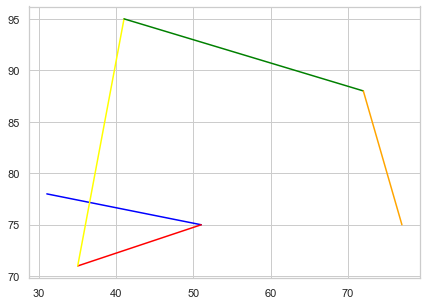

In [245]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for idx,row in AFC_LCFC.iterrows():
    if idx == 1:
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="blue")
    elif idx == 2:
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="red")
    elif idx == 3:
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="yellow")
    elif idx == 4:
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="green")
    elif idx == 5:
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="orange")
    if idx==5:
        break
plt.show()

In [297]:
vardy_ev = AFC_LCFC[AFC_LCFC['lastName']=='Vardy']
# vardy_ev[vardy_ev['eventName'] == 'Pass']
LCFC = AFC_LCFC[AFC_LCFC['teamId'] == 1631]
# AFC_LCFC.teamId

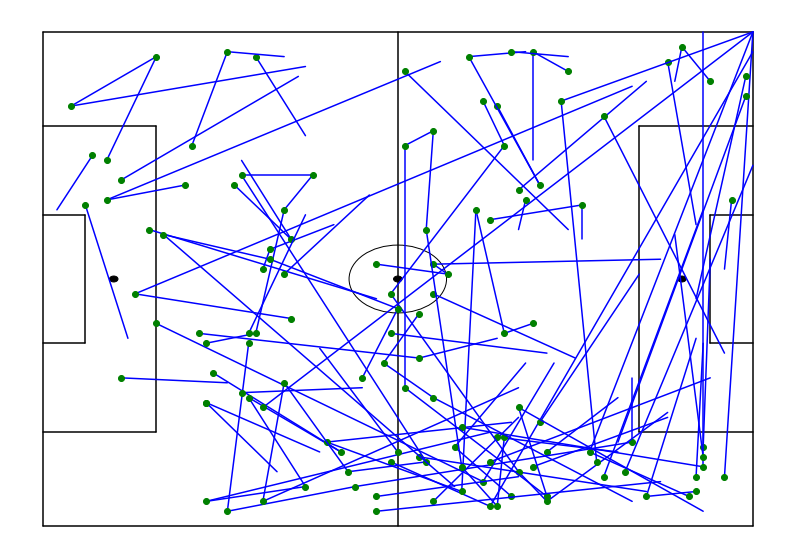

In [298]:
# Create plot of the pitch 
fig=plt.figure()
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black")
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black") # centre line

#Left Penalty Area
plt.plot([16,16],[19,81],color="black")
plt.plot([0,16],[19,19],color="black")
plt.plot([0,16],[81,81],color="black")

#Right Penalty Area
plt.plot([84,100],[19,19],color="black")
plt.plot([84,100],[81,81],color="black")
plt.plot([84,84],[19,81],color="black")

#Left 6-yard Box
plt.plot([0,6],[37,37],color="black")
plt.plot([0,6],[63,63],color="black")
plt.plot([6,6],[37,63],color="black")

#Right 6-yard Box
plt.plot([94,100],[37,37],color="black")
plt.plot([94,100],[63,63],color="black")
plt.plot([94,94],[37,63],color="black")

#Prepare Circles
centreCircle = plt.Circle((50,50),9.15*(3/4),color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((10,50),0.6,color="black")
rightPenSpot = plt.Circle((90,50),0.6,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# #Prepare Arcs
# leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
# rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

# #Draw Arcs
# ax.add_patch(leftArc)
# ax.add_patch(rightArc)

for idx,row in LCFC.iterrows():
    if row['eventName'] == 'Pass':
        plt.plot([row["x_start"],row['x_end']],[row['y_start'],row['y_end']],color="blue")
        plt.plot(row["x_start"],row['y_start'],"o", color="green")
#Tidy Axes
plt.axis('off')
#Display Pitch
plt.show()    

In [29]:
# Join Matches and Competition
matches_compet = matches.merge(compet,left_on='wyId', right_on='wyId')

matches_compet.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,eventId,name,format,area,type


In [20]:
# Find a game with PSG
df_teams = df[df['officialName']=='Paris Saint-Germain FC']
pd.unique(list(df_teams['label']))
# pd.unique(list(df['officialName']))

array(['Angers SCO', 'FC Girondins de Bordeaux', 'FC Nantes',
       'Lille OSC M\\u00e9tropole', 'RC Strasbourg Alsace',
       'Olympique Lyonnais', "O.G.C. Nice C\\u00f4te d'Azur", 'Dijon FCO',
       'Olympique de Marseille', 'FC Metz', 'En Avant Guingamp',
       'AS Monaco FC', 'Toulouse FC', 'Paris Saint-Germain FC',
       'Montpellier HSC', 'Stade Malherbe Caen', 'Amiens SC',
       'Esp\\u00e9rance Sportive Troyes Aube Champagne',
       'AS Saint-\\u00c9tienne', 'Stade Rennais FC'], dtype=object)

In [24]:
df_psg_mars = df[df['label']=='PSG - Olympique Marseille, 3 - 0']
df_psg_mars.columns

Index(['eventId_x', 'subEventName', 'tags', 'playerId_x', 'positions',
       'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec',
       'subEventId', 'id', 'status', 'roundId', 'gameweek', 'teamsData',
       'seasonId', 'dateutc', 'winner', 'venue', 'wyId_x', 'label', 'date',
       'groupName', 'referees', 'duration', 'competitionId', 'eventId_y',
       'passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId_y',
       'foot', 'shortName', 'currentNationalTeamId', 'playerId_y', 'fullName',
       'city', 'name', 'wyId', 'officialName', 'area', 'type'],
      dtype='object')

In [26]:
print(pd.value_counts(df_psg_mars['eventName']))
print(pd.unique(list(df_psg_mars['eventName'])))
print(pd.unique(list(df_psg_mars['subEventName'])))


Pass                       782
Duel                       358
Others on the ball         111
Free Kick                   88
Foul                        42
Shot                        24
Save attempt                 9
Offside                      5
Goalkeeper leaving line      2
Name: eventName, dtype: int64
['Pass' 'Duel' 'Shot' 'Free Kick' 'Foul' 'Others on the ball' 'Offside'
 'Save attempt' 'Goalkeeper leaving line']
['Simple pass' 'High pass' 'Ground loose ball duel'
 'Ground defending duel' 'Shot' 'Free Kick' 'Ground attacking duel' 'Foul'
 'Touch' 'Clearance' 'Cross' 'Head pass' 'Air duel' 'Smart pass'
 'Throw in' 'Corner' 'Launch' 'Acceleration' '' 'Free kick cross'
 'Out of game foul' 'Hand pass' 'Goal kick' 'Reflexes' 'Save attempt'
 'Late card foul' 'Goalkeeper leaving line']


In [15]:
# Join Players and Teams
players_teams = df_players.merge(df_teams,left_on='currentTeamId',right_on='wyId')
players_teams.head()


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,...,shortName,currentNationalTeamId,playerId,fullName,city,name,wyId_y,officialName,area,type
0,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,M. Sarr,4423,686,Malang Sarr,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",65,Patrick,,Burner,3775,1996-04-11,170,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Martinique', 'id': '474', 'alpha3cod...",...,P. Burner,null,250,Patrick Burner,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
2,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",65,Jean Micha\u00ebl,,Seri,3775,1991-07-19,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",...,J. Seri,null,384,Jean Micha\u00ebl Seri,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
3,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",80,Marlon,,Santos da Silva Barbosa,3775,1995-09-07,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Brazil', 'id': '76', 'alpha3code': '...",...,Marlon,null,76,Marlon Santos da Silva Barbosa,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",68,Romain,,Perraud,3775,1997-09-22,173,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,R. Perraud,4426,250,Romain Perraud,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club


# Visualizations
- TODO: 
1. Create a pitch plot thats fit our given datasets x/y coordinates  

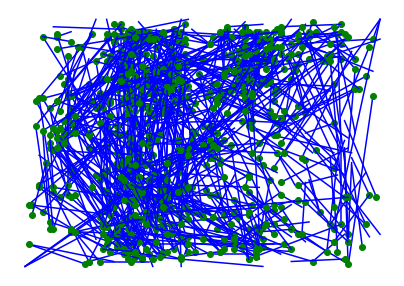

In [28]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Tidy Axes
plt.axis('off')

pass_cols = ['Simple pass','High pass','Smart pass']
goal_cols = ['Shot']
for idx,row in df_psg_mars.iterrows():
    positions = row.positions
#     print(row['fullName'])
#     break
#     if row['subEventName'] in pass_cols:
    
#     if row['name'] == 'PSG' and row['fullName']=='Neymar da Silva Santos Junior':
    if row['eventName'] == 'Pass':
        Xstart = positions[0]['x']
        Ystart = positions[0]['y']
        Xend = positions[1]['x']
        Yend = positions[1]['y']
        plt.plot([int(Xstart),int(Xend)],
                 [int(Ystart),int(Yend)], 
                 color="blue")
        plt.plot(int(Xstart),int(Ystart),"o", color="green")
#     if row['eventName'] == 'Shot':
#         Xstart = positions[0]['x']
#         Ystart = positions[0]['y']
#         Xend = positions[1]['x']
#         Yend = positions[1]['y']
#         plt.plot([int(Xstart),int(Xend)],
#                  [int(Ystart),int(Yend)], 
#                  color="yellow")
#             
            

        

#Display Pitch
plt.show()


In [ ]:
# #Pitch Outline & Centre Line
# plt.plot([0,0],[0,90], color="black")
# plt.plot([0,130],[90,90], color="black")
# plt.plot([130,130],[90,0], color="black")
# plt.plot([130,0],[0,0], color="black")
# plt.plot([65,65],[0,90], color="black")

# #Left Penalty Area
# plt.plot([16.5,16.5],[65,25],color="black")
# plt.plot([0,16.5],[65,65],color="black")
# plt.plot([16.5,0],[25,25],color="black")

# #Right Penalty Area
# plt.plot([130,113.5],[65,65],color="black")
# plt.plot([113.5,113.5],[65,25],color="black")
# plt.plot([113.5,130],[25,25],color="black")

# #Left 6-yard Box
# plt.plot([0,5.5],[54,54],color="black")
# plt.plot([5.5,5.5],[54,36],color="black")
# plt.plot([5.5,0.5],[36,36],color="black")

# #Right 6-yard Box
# plt.plot([130,124.5],[54,54],color="black")
# plt.plot([124.5,124.5],[54,36],color="black")
# plt.plot([124.5,130],[36,36],color="black")

# #Prepare Circles
# centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
# centreSpot = plt.Circle((65,45),0.8,color="black")
# leftPenSpot = plt.Circle((11,45),0.8,color="black")
# rightPenSpot = plt.Circle((119,45),0.8,color="black")

# #Draw Circles
# ax.add_patch(centreCircle)
# ax.add_patch(centreSpot)
# ax.add_patch(leftPenSpot)
# ax.add_patch(rightPenSpot)

# #Prepare Arcs
# leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
# rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

# #Draw Arcs
# ax.add_patch(leftArc)
# ax.add_patch(rightArc)